[(0.8039185428860446, 0.8298868330007279), (0.3733192516121917, 0.7857337204557159), (0.35733952555268433, 0.2245496610211407)] 13.113389522438586
[(0.8195782640301404, 0.07424169885196084), (0.8112789239917235, 0.542107743162832), (0.19168648758826617, 0.08515060724551915)] 2.4802750644564813


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

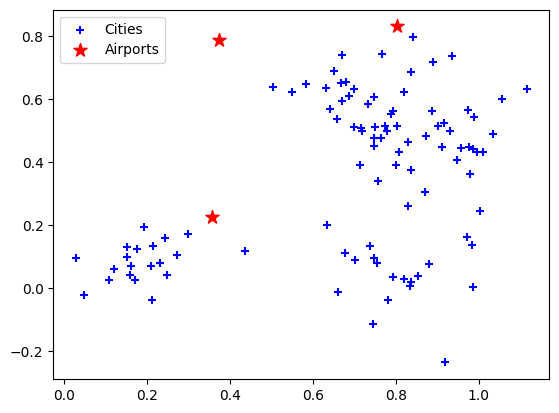

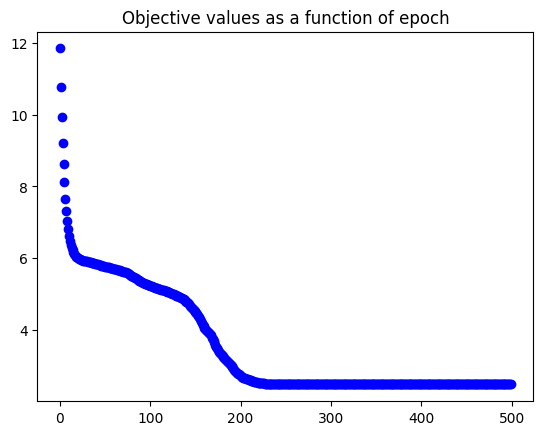

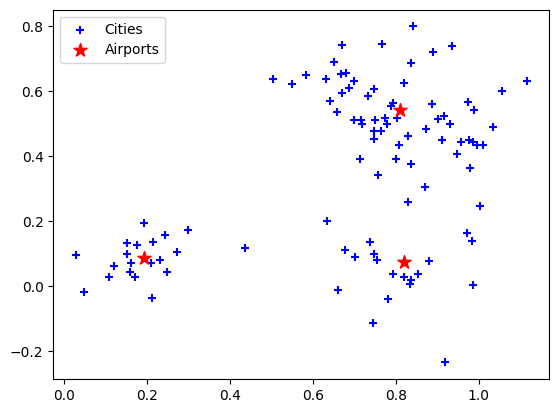

In [3]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

def eucledian_distance(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1] - y[1])**2)

#distance for objective function. (eucledian distance without square root)
def objective_function_distance(x,y):
    return (x[0]-y[0])**2 + (x[1] - y[1])**2
    
#defining 3 sets c1,2,3 to denote cities closest to airport a1,2,3
c1 = set()
c2 = set()
c3 = set()

# function to identify the airport closest to each city
def closest_cities():
    c1.clear()
    c2.clear()
    c3.clear()
    for city in cities:
        distances = []
        for airport in airports:
            distances.append(eucledian_distance(city,airport))
        index = np.argmin(distances)
        if(index == 0):
            c1.add(city)
        elif(index == 1):
            c2.add(city)
        else:
            c3.add(city)

# Objective function
def objective_function():
    sum = 0;

    # sum of distance between each city in set c1 with airport1
    for city in c1:
        sum += objective_function_distance(city,airports[0])
    # sum of distance between each city in set c1 with airport1
    for city in c2:
        sum += objective_function_distance(city,airports[1])
    # sum of distance between each city in set c1 with airport1
    for city in c3:
        sum += objective_function_distance(city,airports[2])
    return sum;

#Gradient Descent for 6 dimensions x1,y1,x2,y2,x3,y3, where (xi,yi) is x and y co-ordinate of airport_i
def gradient_descent():
    der_x1=0
    der_y1=0 
    der_x2=0
    der_y2=0
    der_x3=0
    der_y3=0
    for city in c1:
        der_x1 += 2*(airports[0][0]-city[0])
        der_y1 += 2*(airports[0][1]-city[1])
    for city in c2:
        der_x2 += 2*(airports[1][0]-city[0])
        der_y2 += 2*(airports[1][1]-city[1])
    for city in c3:
        der_x3 += 2*(airports[2][0]-city[0])
        der_y3 += 2*(airports[2][1]-city[1])
    return [der_x1,der_y1,der_x2,der_y2,der_x3,der_y3]

# learning_rate = 0.001 and iterations = 1000

learning_rate = 0.001
iterations = 500

closest_cities()

# co-ordinates of airports and the sum of distances (objective function before optimization
print(airports,objective_function())

import matplotlib.pyplot as plt

plt.figure(0)
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

for i in range(iterations):
    # first create the three set of cities
    closest_cities()
    # now get the gradient vector 
    gradients = gradient_descent()
    # Updating the value of airports
    airports[0] = (airports[0][0] - learning_rate*gradients[0], airports[0][1] - learning_rate*gradients[1])
    airports[1] = (airports[1][0] - learning_rate*gradients[2], airports[1][1] - learning_rate*gradients[3])
    airports[2] = (airports[2][0] - learning_rate*gradients[4], airports[2][1] - learning_rate*gradients[5])

    # get the updated value of objective function to plot the graph.
    distance = objective_function()
    plt.figure(1)
    plt.title("Objective values as a function of epoch")
    plt.scatter(i,distance,color='b')
    plt
    

# co-ordinates of airports and the sum of distances objective function after optimization
print(airports,objective_function())    

plt.figure(2)
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt


